# Explore data

In [1]:
import pandas as pd 
data = pd.read_csv("results.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
division,31984.0,1932.563032,1715.228694,1.00,610.0000,1425.00,2611.000,6979.00
age,31984.0,42.407079,11.316496,18.00,33.0000,42.00,50.000,81.00
official,31984.0,242.997314,52.300431,80.60,205.5275,232.37,273.235,538.88
genderdiv,31984.0,8051.044741,4754.005626,1.00,3972.0000,7970.00,11968.000,17575.00
overall,31984.0,15939.587825,9232.978224,1.00,7943.7500,15939.50,23935.250,31931.00
pace,31984.0,9.275658,1.992486,3.08,7.8500,8.87,10.430,20.57


In [9]:
#correlation matrix
from pandas import DataFrame
import plotly.graph_objs as go
#data = data.dropna()
from sklearn import preprocessing


le_gender = preprocessing.LabelEncoder()
le_country = preprocessing.LabelEncoder()
le_city = preprocessing.LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
data['country'] = le_country.fit_transform(data['country'])
data['city'] = le_city.fit_transform(data['city'].astype(str))

list_data = [[row[2],row[4],row[5],row[6],row[8],row[11],row[12],row[18],row[19] ] for row in data.values]
df_train = DataFrame(list_data, columns=['division','gender','age','official','genderdiv','overall','pace','country','city'])
corrmat = df_train.corr()

#create the chart
sns_colorscale = [[0.0, '#3f7f93'], #cmap = sns.diverging_palette(220, 10, as_cmap = True)
 [0.071, '#5890a1'],
 [0.143, '#72a1b0'],
 [0.214, '#8cb3bf'],
 [0.286, '#a7c5cf'],
 [0.357, '#c0d6dd'],
 [0.429, '#dae8ec'],
 [0.5, '#f2f2f2'],
 [0.571, '#f7d7d9'],
 [0.643, '#f2bcc0'],
 [0.714, '#eda3a9'],
 [0.786, '#e8888f'],
 [0.857, '#e36e76'],
 [0.929, '#de535e'],
 [1.0, '#d93a46']]

heat = go.Heatmap(z=corrmat,
                  x=df_train.columns,
                  y=df_train.columns,
                  xgap=1, ygap=1,
                  colorscale=sns_colorscale,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext =df_train.columns,
                  hoverinfo='text',                  
                   )


title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

# 1. Draw bar graphs (both male & female in different color) for each cluster for male and female, from the bar graphs, you can tell things as which cluster contains the most number of female (or male).

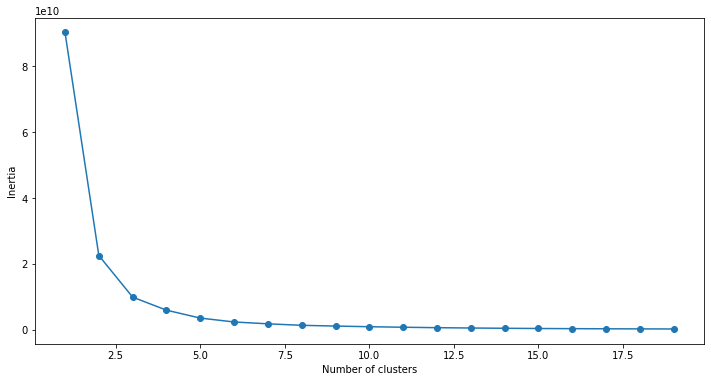

In [11]:
from sklearn.cluster import KMeans
from pandas import DataFrame
import matplotlib.pyplot as plt
list_data = [[(row[5]//10)*10,row[18],row[19] ] for row in data.values]
X = DataFrame(list_data, columns=['age','country','city'])
X['country'] = le_country.fit_transform(X['country'])
X['city'] = le_city.fit_transform(X['city'])
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

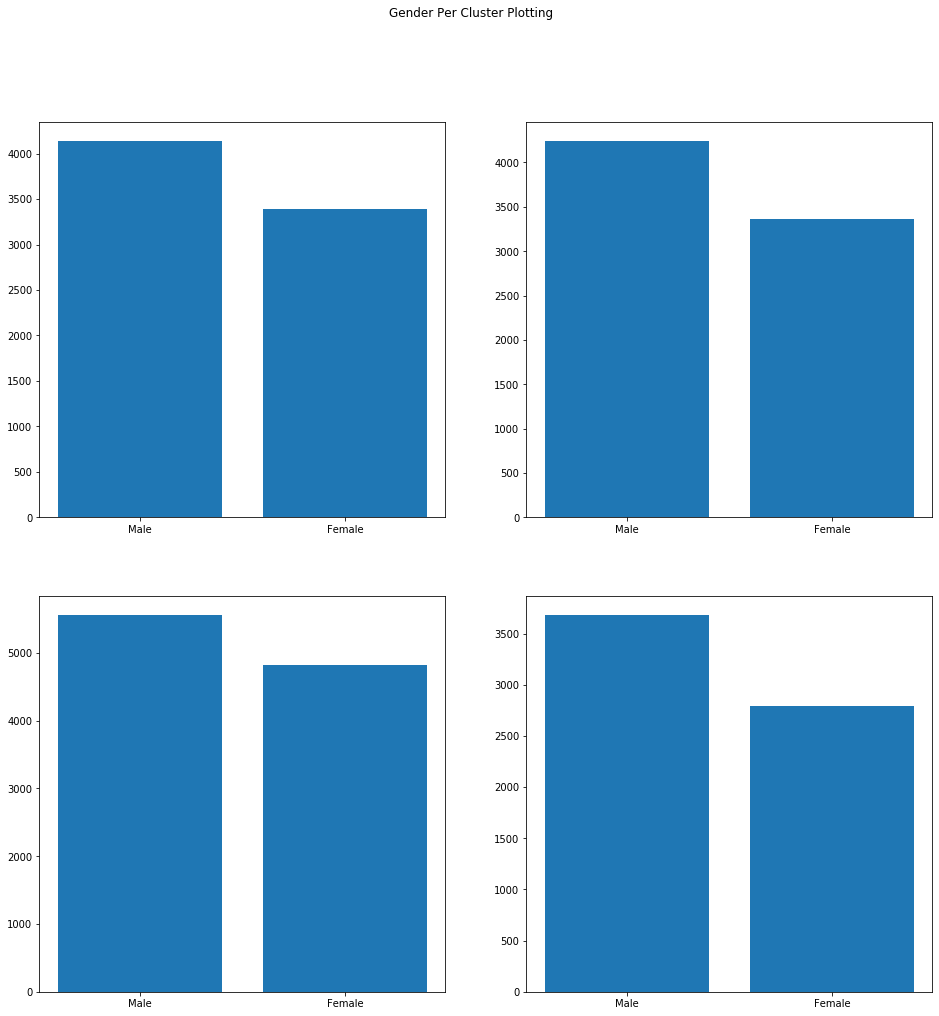

In [12]:
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(X)

data = pd.read_csv("results.csv")
data['cluster'] = kmeans.labels_
data.head()
names = ['Male', 'Female']


plt.figure(figsize=(16, 16))

plt.subplot(221)
count_M = len(data[(data['gender']=='M') & (data['cluster']==0)])
count_F = len(data[(data['gender']=='F') & (data['cluster']==0)])
values = [count_M, count_F]
plt.bar(names, values)
plt.subplot(222)
count_M = len(data[(data['gender']=='M') & (data['cluster']==1)])
count_F = len(data[(data['gender']=='F') & (data['cluster']==1)])
values = [count_M, count_F]
plt.bar(names, values)
plt.subplot(223)
count_M = len(data[(data['gender']=='M') & (data['cluster']==2)])
count_F = len(data[(data['gender']=='F') & (data['cluster']==2)])
values = [count_M, count_F]
plt.bar(names, values)
plt.subplot(224)
count_M = len(data[(data['gender']=='M') & (data['cluster']==3)])
count_F = len(data[(data['gender']=='F') & (data['cluster']==3)])
values = [count_M, count_F]
plt.bar(names, values)
plt.suptitle('Gender Per Cluster Plotting')
plt.show()

# The most People is inside Cluster 1


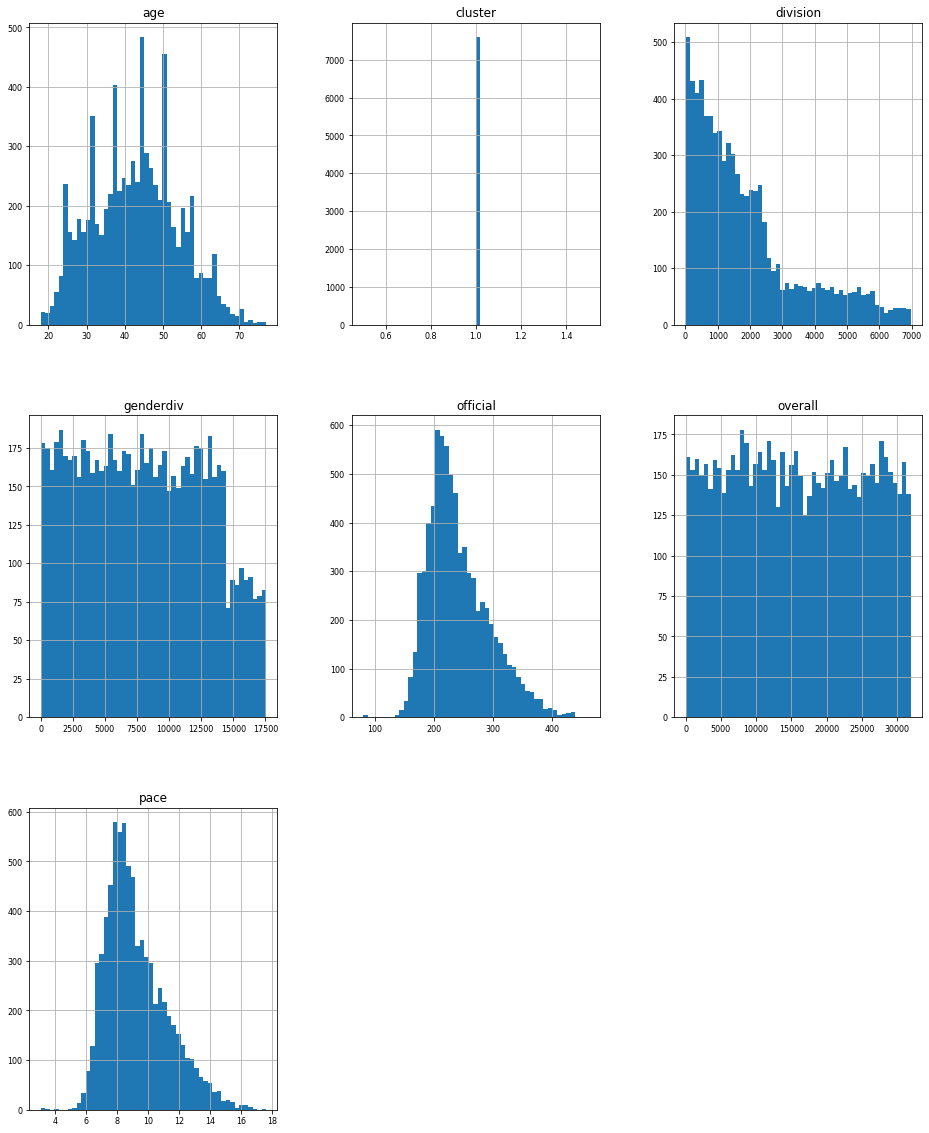

In [13]:
data[(data['cluster']==1)].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [14]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import numpy as np
countries = []
# Extract List of Countries
data_cluster_1 = data[(data['cluster']==1)]
for i in range(len(data_cluster_1)):
    countries.append(data_cluster_1.values[i][18])    

countries = list(dict.fromkeys(countries))
revenue_by_countries = np.zeros(len(countries))
# Extract The Sum of Revenue By Country
for i in range(len(data_cluster_1)):    
    for j in range(len(countries)):        
        if data_cluster_1.values[i][18] == countries[j]:
             revenue_by_countries[j] += 1  
trace = go.Pie(labels = countries, values = revenue_by_countries)
data_trace = [trace]
fig = go.Figure(data = data_trace)
iplot(fig)

# The most people are from Canada and Mexico beside USA

# 2. Draw bar graphs for runners in different ranges of age (dividing by 3 groups: 18-25, 26-40, 40-70 or so) for each cluster (in different colors), from the graph, you should be able to anwser which cluster contains the most young people, which cluster contains oldest people, etc.

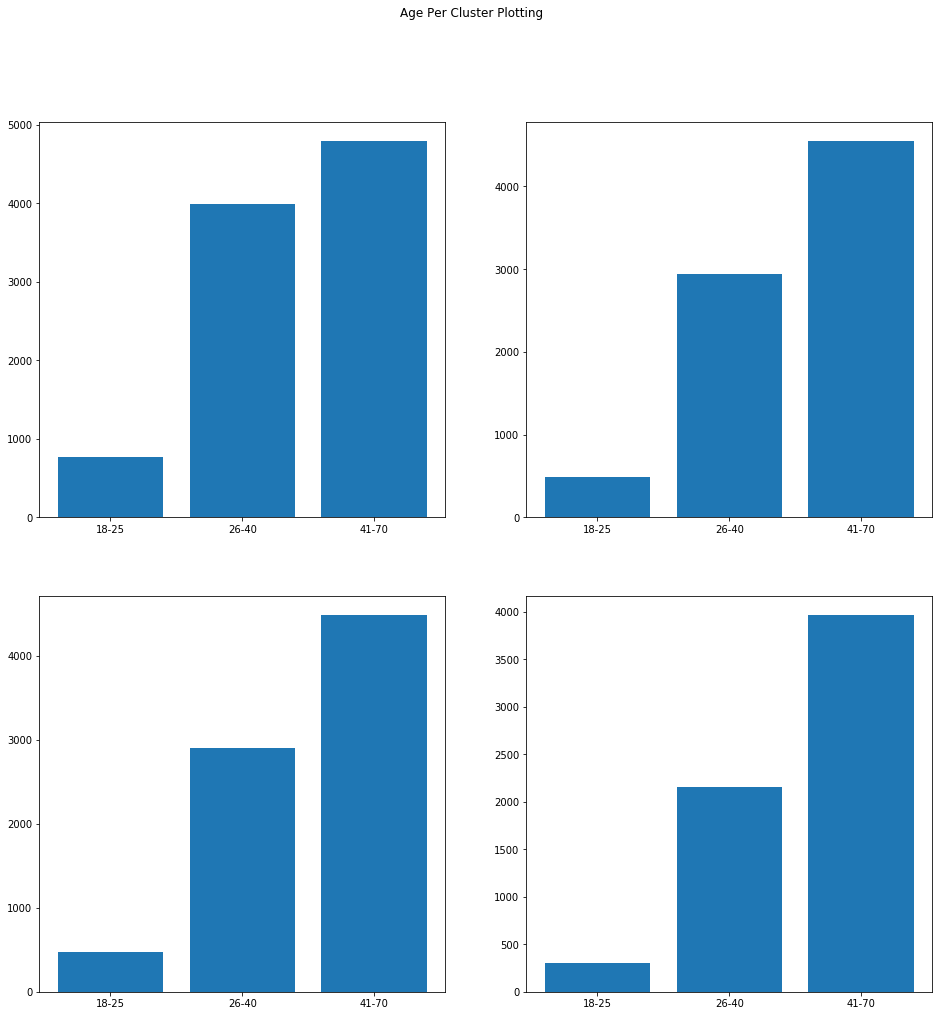

In [19]:
list_data = [[row[4],row[18],row[19] ] for row in data.values]
X = DataFrame(list_data, columns=['gender','country','city'])
X['gender'] = le_gender.fit_transform(X['gender'])
X['country'] = le_country.fit_transform(X['country'])
X['city'] = le_city.fit_transform(X['city'].astype(str))

kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(X)

data = pd.read_csv("results.csv")
data['cluster'] = kmeans.labels_
data.head()
names = ['18-25', '26-40','41-70']


plt.figure(figsize=(16, 16))

plt.subplot(221)
count_18 = len(data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==0)])
count_26 = len(data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==0)])
count_41 = len(data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==0)])
values = [count_18, count_26, count_41]
plt.bar(names, values)
plt.subplot(222)
count_18 = len(data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==1)])
count_26 = len(data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==1)])
count_41 = len(data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==1)])
values = [count_18, count_26, count_41]
plt.bar(names, values)
plt.subplot(223)
count_18 = len(data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==2)])
count_26 = len(data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==2)])
count_41 = len(data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==2)])
values = [count_18, count_26, count_41]
plt.bar(names, values)
plt.subplot(224)
count_18 = len(data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==3)])
count_26 = len(data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==3)])
count_41 = len(data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==3)])
values = [count_18, count_26, count_41]
plt.bar(names, values)
plt.suptitle('Age Per Cluster Plotting')
plt.show()

# Cluster 0 is most young people and most oldest people

# 3. Do the same things as above for finishing time (which group runs fastest).

In [24]:
print("Average Finish Marathon Time: ")
print("Cluster 0: ")
print("   18-25: ", data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==0)]['official'].mean())
print("   26-40: ", data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==0)]['official'].mean())
print("   41-70: ", data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==0)]['official'].mean())
print("Cluster 1: ")
print("   18-25: ", data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==1)]['official'].mean())
print("   26-40: ", data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==1)]['official'].mean())
print("   41-70: ", data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==1)]['official'].mean())
print("Cluster 2: ")
print("   18-25: ", data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==2)]['official'].mean())
print("   26-40: ", data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==2)]['official'].mean())
print("   41-70: ", data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==2)]['official'].mean())
print("Cluster 3: ")
print("   18-25: ", data[(18<=data['age']) & (data['age']<=25) & (data['cluster']==3)]['official'].mean())
print("   26-40: ", data[(26<=data['age']) & (data['age']<=40) & (data['cluster']==3)]['official'].mean())
print("   41-70: ", data[(41<=data['age']) & (data['age']<=70) & (data['cluster']==3)]['official'].mean())

Average Finish Marathon Time: 
Cluster 0: 
   18-25:  245.45451108213788
   26-40:  240.58991489361685
   41-70:  245.66215731274795
Cluster 1: 
   18-25:  240.419345603272
   26-40:  235.37206062670305
   41-70:  248.46411997363236
Cluster 2: 
   18-25:  235.20619747899175
   26-40:  236.50487055574797
   41-70:  249.3391434307394
Cluster 3: 
   18-25:  235.5473825503355
   26-40:  229.42623955431765
   41-70:  244.68129162462154


# the fastest group is 26- 